In [67]:
import requests
from datetime import datetime, timedelta

def get_highest_temperature(api_token, station_id):
    # Define the endpoint for the NOAA API
    url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"

    # Calculate the date range for the last week
    end_date = datetime.now()
    start_date = end_date - timedelta(days=7)

    # Format dates for the API request
    start_date_str = start_date.strftime('%Y-%m-%d')
    end_date_str = end_date.strftime('%Y-%m-%d')

    # Parameters for the API request
    params = {
        "datasetid": "GHCND",  # Global Historical Climatology Network Daily
        "stationid": station_id,  # Station ID for a station in NYC
        "startdate": "2023-12-15",
        "enddate": "2023-12-15",
        "datatypeid": "TMAX",  # Maximum temperature
        "units": "metric",
        "limit": 1000
    }

    headers = {
        "token": api_token  # NOAA API token
    }

    # Make the API request
    response = requests.get(url, headers=headers, params=params)
    data = response.json()

    # Find the highest temperature
    highest_temp = max(record['value'] for record in data['results'])

    return highest_temp


api_token = "bjBerSTEhmMyXQSFTYYaVUPuIBCymLYa"

station_id = "GHCND:USW00094728"

# Get the highest temperature
highest_temperature = get_highest_temperature(api_token, station_id)
print(f"The highest temperature in NYC last week was {1.8*highest_temperature+32}°F")

The highest temperature in NYC last week was 57.92°F


In [9]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta

def get_daily_max_temp(url):
    response = requests.get(url)
    if response.status_code != 200:
        return None

    soup = BeautifulSoup(response.text, 'html.parser')

    # Find and extract the temperature data
    # This will depend on the specific structure of the page
    temps = soup.find_all('span', {'class': 'temp'})  # This is an example, adjust based on actual webpage
    max_temp = max([int(temp.text.replace('°C', '')) for temp in temps])

    return max_temp

def get_highest_temp(base_url, days):
    highest_temp = []
    start_date = datetime.now() - timedelta(days=days)

    for _ in range(days):
        date_str = start_date.strftime('%Y-%m-%d')
        url = f"{base_url}/{date_str}"
        daily_max = get_daily_max_temp(url)

        if daily_max is not None:
            highest_temp.append([highest_temp,date_str])

        start_date += timedelta(days=1)

    return highest_temp

# Base URL for the historical data (needs to be the correct format for timeanddate.com)
base_url = 'https://www.timeanddate.com/weather/usa/new-york/historic'

# Get the highest temperature of the last 300 days
highest_temperature = get_highest_temp(base_url, 300)
#print(highest_temperature[0])

In [ ]:
import requests

# From Dec 11 to Dec 15

# Link: https://www.timeanddate.com/weather/usa/new-york/historic
data1 = [48, 45, 46, 39, 57]

# Link: https://www.wunderground.com/history/weekly/us/ny/new-york-city/KLGA/date/2023-12-11
data2 = [46, 44, 46, 41, 59]

# Link: https://www.localconditions.com/weather-new-york-new-york/10001/past.php
data3 = [48.02, 44.06, 46.94, 39.92, 57.92]

# Data from the script above from NOAA
data4 = [50, 44.06, 46.94, 41.0, 57.92]

# It's hard to directly get the data using scripts so I recorded the data on the websites.

In [31]:
# We use the most direct data of NCEI to build the model
import requests
from datetime import datetime, timedelta

def get_highest_temperature(api_token, station_id):
    # Define the endpoint for the NOAA API
    url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"

    # Calculate the date range for the last week
    end_date = datetime.now()
    # start_date = end_date - timedelta(days=7)

    # Format dates for the API request
    # start_date_str = start_date.strftime('%Y-%m-%d')
    # end_date_str = end_date.strftime('%Y-%m-%d')

    # Get the data from previous days, while if the period is longer it will produce mistakes
    highest_temps = []

    for i in range(30):
      end_date = datetime.today() - timedelta(days=4)
      start_date = end_date - timedelta(days=30-i)
      start_date_str = start_date.strftime('%Y-%m-%d')

    # Parameters for the API request
      params = {
        "datasetid": "GHCND",  # Global Historical Climatology Network Daily
        "stationid": station_id,  # Station ID for a station in NYC
        "startdate": start_date_str,
        "enddate": start_date_str,
        "datatypeid": "TMAX",  # Maximum temperature
        "units": "metric",
        "limit": 1000
      }

      headers = {
        "token": api_token  # NOAA API token
      }

      # Make the API request
      response = requests.get(url, headers=headers, params=params)
      data = response.json()

      # Find the highest temperature
      highest_temp = max(record['value'] for record in data['results'])
      # Change to F
      highest_temps.append(1.8*highest_temp+32)

    return highest_temps

# Use your NOAA API token here
api_token = "bjBerSTEhmMyXQSFTYYaVUPuIBCymLYa"
# Station ID for a station in NYC (e.g., "GHCND:USW00094728" for Central Park)
station_id = "GHCND:USW00094728"

# Get the highest temperature
highest_temperatures = get_highest_temperature(api_token, station_id)
#print(f"The highest temperature in NYC last week was {1.8*highest_temperature+32}°F")
print(highest_temperatures)


[53.06, 64.94, 66.92, 62.96, 55.040000000000006, 46.04, 48.019999999999996, 53.96, 51.980000000000004, 51.08, 39.92, 55.94, 55.94, 41.0, 37.94, 51.08, 51.08, 60.08, 53.06, 53.96, 42.980000000000004, 42.980000000000004, 39.019999999999996, 51.08, 59.0, 60.980000000000004, 50.0, 44.06, 46.94, 41.0]


In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# from sklearn.cluster import KMeans
# from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error

# Create Training Datasets
X = []
for i in range(30):
  X.append(i)
X=np.array(X).reshape(-1,1)
y = np.array(highest_temperatures).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# model = LinearRegression()
# model = KNeighborsClassifier(n_neighbors=3)
# Use Decision Tree and Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# The MSE might be a little big as the number of dates are not quite enough

Mean Squared Error: 67.85330093999951


<ipython-input-69-51265565c5e9>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


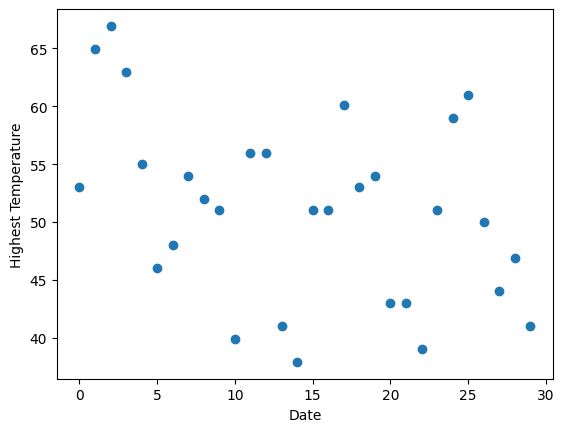

In [70]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.xlabel("Date")
plt.ylabel("Highest Temperature")
plt.show()

In [71]:
# Predict the Following Highest Temperatures From the Dataset
model.fit(X, y)
X2=np.array([30]).reshape(-1,1)
y_pred2 = model.predict(X2)
print(y_pred2)
# Using this model, as the temperature changes too frequently, it just predicts a number for the date after that
# Actually it's 57.92 while prediction result is 42.7334, and we add that to our training set

<ipython-input-71-0dbbeec15711>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


[42.7334]


In [72]:
# Add new data into training set
X = np.append(X,[30]).reshape(-1,1)
print(X)
y = np.append(y,[57.92]).reshape(-1,1)
model.fit(X, y)
X3=np.array([31]).reshape(-1,1)
y_pred3 = model.predict(X3)
print(y_pred3)
# The result is 51.9206, Closer to actual result 54;

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]]
[51.9206]


<ipython-input-72-3aa1bdf09b0b>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


In [73]:
# Add new data into training set
X = np.append(X,[31]).reshape(-1,1)
print(X)
y = np.append(y,[54]).reshape(-1,1)
model.fit(X, y)
X4=np.array([32]).reshape(-1,1)
y_pred4 = model.predict(X4)
print(y_pred4)
# The result is 53, while the actual result is 59;

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]]
[52.9946]


<ipython-input-73-62585f5b3253>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


In [74]:
# Add new data into training set
X = np.append(X,[32]).reshape(-1,1)
print(X)
y = np.append(y,[59]).reshape(-1,1)
model.fit(X, y)
X5=np.array([33]).reshape(-1,1)
y_pred5 = model.predict(X5)
print(y_pred5)
# The result is 56.7322, while the actual result is 63;

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]]


<ipython-input-74-f0ac7af0bb0a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


[56.7322]


In [75]:
# Add new data into training set
X = np.append(X,[33]).reshape(-1,1)
print(X)
y = np.append(y,[63]).reshape(-1,1)
model.fit(X, y)
X6=np.array([34]).reshape(-1,1)
y_pred6 = model.predict(X6)
print(y_pred6)
# The result is 60.6668， while the actual result is 43;

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]]


<ipython-input-75-046b60042cde>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


[60.6668]


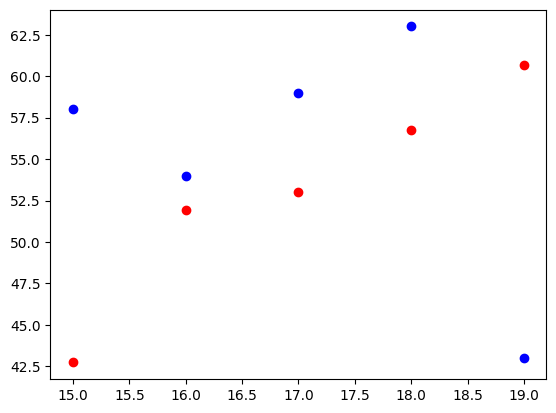

In [79]:
# Plot the Graph of Predictions and actual temperatures
dates = [15, 16, 17, 18, 19]
preds = [42.7334, 51.9206, 53, 56.7322, 60.6668]
temps = [58, 54, 59, 63, 43]
plt.scatter(dates, preds, c='red')
plt.scatter(dates, temps, c='blue')
plt.show()